Cyna Shirazinejad, 7/7/21

# Notebook 15: analyze scission-present ARPC3+ CCPs, 'zero' padding

outline:
* comparison of lifetimes of ARPC3+/- CCPs
* comparison of aligned intensities of ARPC3+/- CCPs

##### import all necessary Python modules

In [157]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
from scipy import signal
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
analysis_metadata = np.load('analysis_metadata.npy', allow_pickle=True)
sys.path.append(analysis_metadata.item().get('path_notebook')+'/cmeAnalysisPostProcessingSimplified') # add custom Python scripts to the local path
import generate_index_dictionary
import return_track_attributes
import display_tracks
index_dictionary = generate_index_dictionary.return_index_dictionary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load files

In [158]:
path_outputs = analysis_metadata.item().get('path_outputs')

In [159]:
experiment = 'ada_wildtype'

with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  

sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

experiment_number_arpc3_positive_sigdnm2_wt = merged_results['experiment_number_arpc3_positive_sigdnm2']
ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_wt = list(np.array(merged_results['ap2_arpc3_separation_at_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])
absolute_ap2_x_position_arpc3_positive_wt = list(np.array(merged_results['absolute_ap2_x_position_arpc3_positive'], dtype='object'))
absolute_ap2_y_position_arpc3_positive_wt = list(np.array(merged_results['absolute_ap2_y_position_arpc3_positive'], dtype='object'))
time_ap2_appearance_to_dnm2_peak_arpc3_positive_wt = list(np.array(merged_results['time_ap2_appearance_to_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])

print(len(experiment_number_arpc3_positive_sigdnm2_wt),
      len(ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_wt), 
      len(absolute_ap2_x_position_arpc3_positive_wt))

1385 1385 1385


In [160]:
channel_amplitudes_arpc3_positive = []
for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
    channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
                                              merged_results['ch1_vectors_arpc3_positive'][i],
                                              merged_results['ch2_vectors_arpc3_positive'][i],
                                              merged_results['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results['channel_0_2_separations_arpc3_positive'][i],
                                              merged_results['channel_1_2_separations_arpc3_positive'][i]])
channel_amplitudes_arpc3_positive_wt = np.array(channel_amplitudes_arpc3_positive, dtype='object')[indices_sig_arpc3_dnm2_peak]

In [161]:
experiment = 'ada_ck666_nt'

with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  

sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

experiment_number_arpc3_positive_sigdnm2_ck666_nt = merged_results['experiment_number_arpc3_positive_sigdnm2']
ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_ck666_nt = list(np.array(merged_results['ap2_arpc3_separation_at_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])
absolute_ap2_x_position_arpc3_positive_ck666_nt = list(np.array(merged_results['absolute_ap2_x_position_arpc3_positive'], dtype='object'))
absolute_ap2_y_position_arpc3_positive_ck666_nt = list(np.array(merged_results['absolute_ap2_y_position_arpc3_positive'], dtype='object'))
time_ap2_appearance_to_dnm2_peak_arpc3_positive_nt = list(np.array(merged_results['time_ap2_appearance_to_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])

print(len(experiment_number_arpc3_positive_sigdnm2_ck666_nt),
      len(ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_ck666_nt), 
      len(absolute_ap2_x_position_arpc3_positive_ck666_nt))

1352 1352 1352


In [162]:
channel_amplitudes_arpc3_positive = []
for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
    channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
                                              merged_results['ch1_vectors_arpc3_positive'][i],
                                              merged_results['ch2_vectors_arpc3_positive'][i],
                                              merged_results['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results['channel_0_2_separations_arpc3_positive'][i],
                                              merged_results['channel_1_2_separations_arpc3_positive'][i]])
channel_amplitudes_arpc3_positive_nt = np.array(channel_amplitudes_arpc3_positive, dtype='object')[indices_sig_arpc3_dnm2_peak]

In [163]:
experiment = 'ada_hypotonic_before'

with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  

sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

experiment_number_arpc3_positive_sigdnm2_hypotonic_before = merged_results['experiment_number_arpc3_positive_sigdnm2']
ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_hypotonic_before = list(np.array(merged_results['ap2_arpc3_separation_at_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])
absolute_ap2_x_position_arpc3_positive_hypotonic_before = list(np.array(merged_results['absolute_ap2_x_position_arpc3_positive'], dtype='object'))
absolute_ap2_y_position_arpc3_positive_hypotonic_before = list(np.array(merged_results['absolute_ap2_y_position_arpc3_positive'], dtype='object'))
time_ap2_appearance_to_dnm2_peak_arpc3_positive_before = list(np.array(merged_results['time_ap2_appearance_to_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak])

print(len(experiment_number_arpc3_positive_sigdnm2_hypotonic_before),
      len(ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_hypotonic_before), 
      len(absolute_ap2_x_position_arpc3_positive_hypotonic_before))

1175 1175 1175


In [164]:
channel_amplitudes_arpc3_positive = []
for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
    channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
                                              merged_results['ch1_vectors_arpc3_positive'][i],
                                              merged_results['ch2_vectors_arpc3_positive'][i],
                                              merged_results['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results['channel_0_2_separations_arpc3_positive'][i],
                                              merged_results['channel_1_2_separations_arpc3_positive'][i]])
channel_amplitudes_arpc3_positive_before = np.array(channel_amplitudes_arpc3_positive, dtype='object')[indices_sig_arpc3_dnm2_peak]

In [165]:
channel_amplitudes_arpc3_positive = np.concatenate((channel_amplitudes_arpc3_positive_wt, 
                                                    channel_amplitudes_arpc3_positive_nt,
                                                    channel_amplitudes_arpc3_positive_before))

In [166]:
channel_amplitudes_arpc3_positive.shape

(3912, 6)

In [167]:
exp_num_merged = experiment_number_arpc3_positive_sigdnm2_wt + experiment_number_arpc3_positive_sigdnm2_ck666_nt + experiment_number_arpc3_positive_sigdnm2_hypotonic_before
separation_merged = ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_wt + ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_ck666_nt + ap2_arpc3_separation_at_dnm2_peak_arpc3_positive_hypotonic_before
absolute_x_merged = absolute_ap2_x_position_arpc3_positive_wt + absolute_ap2_x_position_arpc3_positive_ck666_nt + absolute_ap2_x_position_arpc3_positive_hypotonic_before
absolute_y_merged = absolute_ap2_y_position_arpc3_positive_wt + absolute_ap2_y_position_arpc3_positive_ck666_nt + absolute_ap2_y_position_arpc3_positive_hypotonic_before
ccp_lifetime_merged = time_ap2_appearance_to_dnm2_peak_arpc3_positive_wt + time_ap2_appearance_to_dnm2_peak_arpc3_positive_nt + time_ap2_appearance_to_dnm2_peak_arpc3_positive_before

In [168]:
# separation_quantiles = pd.qcut(separation_merged, 
#                                q=[0, .25, .5, .75, 1.], 
#                                labels=False)

In [169]:
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [170]:
separation_quantiles = pd.qcut(separation_merged, 
                               q=[0, .25, .5, .75, 1.], 
                               labels=False)

In [171]:
distance_from_center = []

center_x = 512/2
center_y = 512/2

for i in range(len(absolute_x_merged)):
    
    x_pos = absolute_x_merged[i]
    y_pos = absolute_y_merged[i]
    
    mean_x = np.mean(x_pos)
    mean_y = np.mean(y_pos)
    
    dist = np.sqrt((mean_x-center_x)**2 + (mean_y-center_y)**2)
    distance_from_center.append(dist)

(array([ 61., 195., 327., 486., 580., 681., 720., 547., 234.,  81.]),
 array([  3.00802534,  37.38295979,  71.75789424, 106.13282868,
        140.50776313, 174.88269758, 209.25763202, 243.63256647,
        278.00750092, 312.38243536, 346.75736981]),
 <a list of 10 Patch objects>)

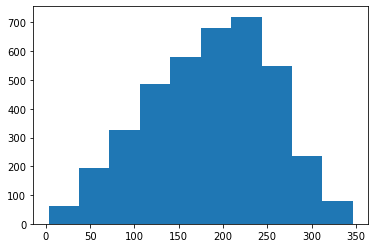

In [172]:
plt.hist(distance_from_center)

In [173]:
data_df = np.array((distance_from_center, separation_quantiles)).T

In [174]:
df_sep = pd.DataFrame(data_df, columns=['distance', 
                                        'quantile'])

In [175]:
df_sep

,distance,quantile
0,117.221692,0.0
1,139.552132,2.0
2,137.243252,2.0
3,124.826504,1.0
4,245.202765,1.0
...,...,...
3907,257.888463,3.0
3908,112.356535,0.0
3909,123.551646,0.0
3910,99.339101,0.0


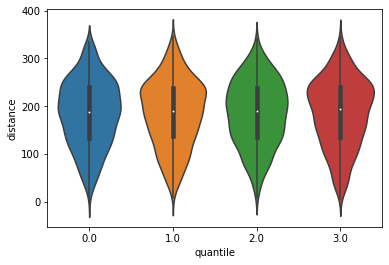

In [176]:
sns.violinplot(x="quantile", y="distance", data=df_sep)

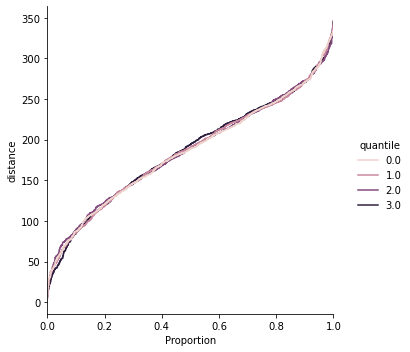

In [177]:
sns.displot(y="distance", data=df_sep, kind='ecdf', hue='quantile')

In [178]:
# channel_amplitudes_arpc3_positive = []
# for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
#     channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
#                                               merged_results['ch1_vectors_arpc3_positive'][i],
#                                               merged_results['ch2_vectors_arpc3_positive'][i],
#                                               merged_results['channel_0_1_separations_arpc3_positive'][i],
#                                               merged_results['channel_0_2_separations_arpc3_positive'][i],
#                                               merged_results['channel_1_2_separations_arpc3_positive'][i]])
# channel_amplitudes_arpc3_positive = np.array(channel_amplitudes_arpc3_positive)[indices_sig_arpc3_dnm2_peak]

In [179]:
channel_amplitudes_arpc3_positive_quantiles = []
for group in set(separation_quantiles):
    
    indices_group = np.where(separation_quantiles==group)[0]
    channel_amplitudes_arpc3_positive_quantiles.append(channel_amplitudes_arpc3_positive[indices_group])    

In [180]:
%%capture
fig, (axes_0, axes_1, axes_2, axes_3) = plt.subplots(4, 1, dpi=500, figsize=(6,16), gridspec_kw=dict(height_ratios=[1,1,1,1]))
axes_separation_0 = axes_0.twinx()
axes_separation_1 = axes_1.twinx()
axes_separation_2 = axes_2.twinx()
axes_separation_3 = axes_3.twinx()

cohorts = [[0, 200]]

_, _, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_arpc3_positive_quantiles[0], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-92, -92, -92])

_, _, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_arpc3_positive_quantiles[1], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

_, _, max_dnm2_cohort_indices_2 = display_tracks.plot_separated_cohorts([axes_2], 
                                                                         channel_amplitudes_arpc3_positive_quantiles[2], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

_, _, max_dnm2_cohort_indices_3 = display_tracks.plot_separated_cohorts([axes_3], 
                                                                         channel_amplitudes_arpc3_positive_quantiles[3], 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])                                                                           

shift_0 = max_dnm2_cohort_indices_0[0]
shift_1 = max_dnm2_cohort_indices_1[0]
shift_2 = max_dnm2_cohort_indices_2[0]
shift_3 = max_dnm2_cohort_indices_3[0]



[0]
[0]
[0]
[0]


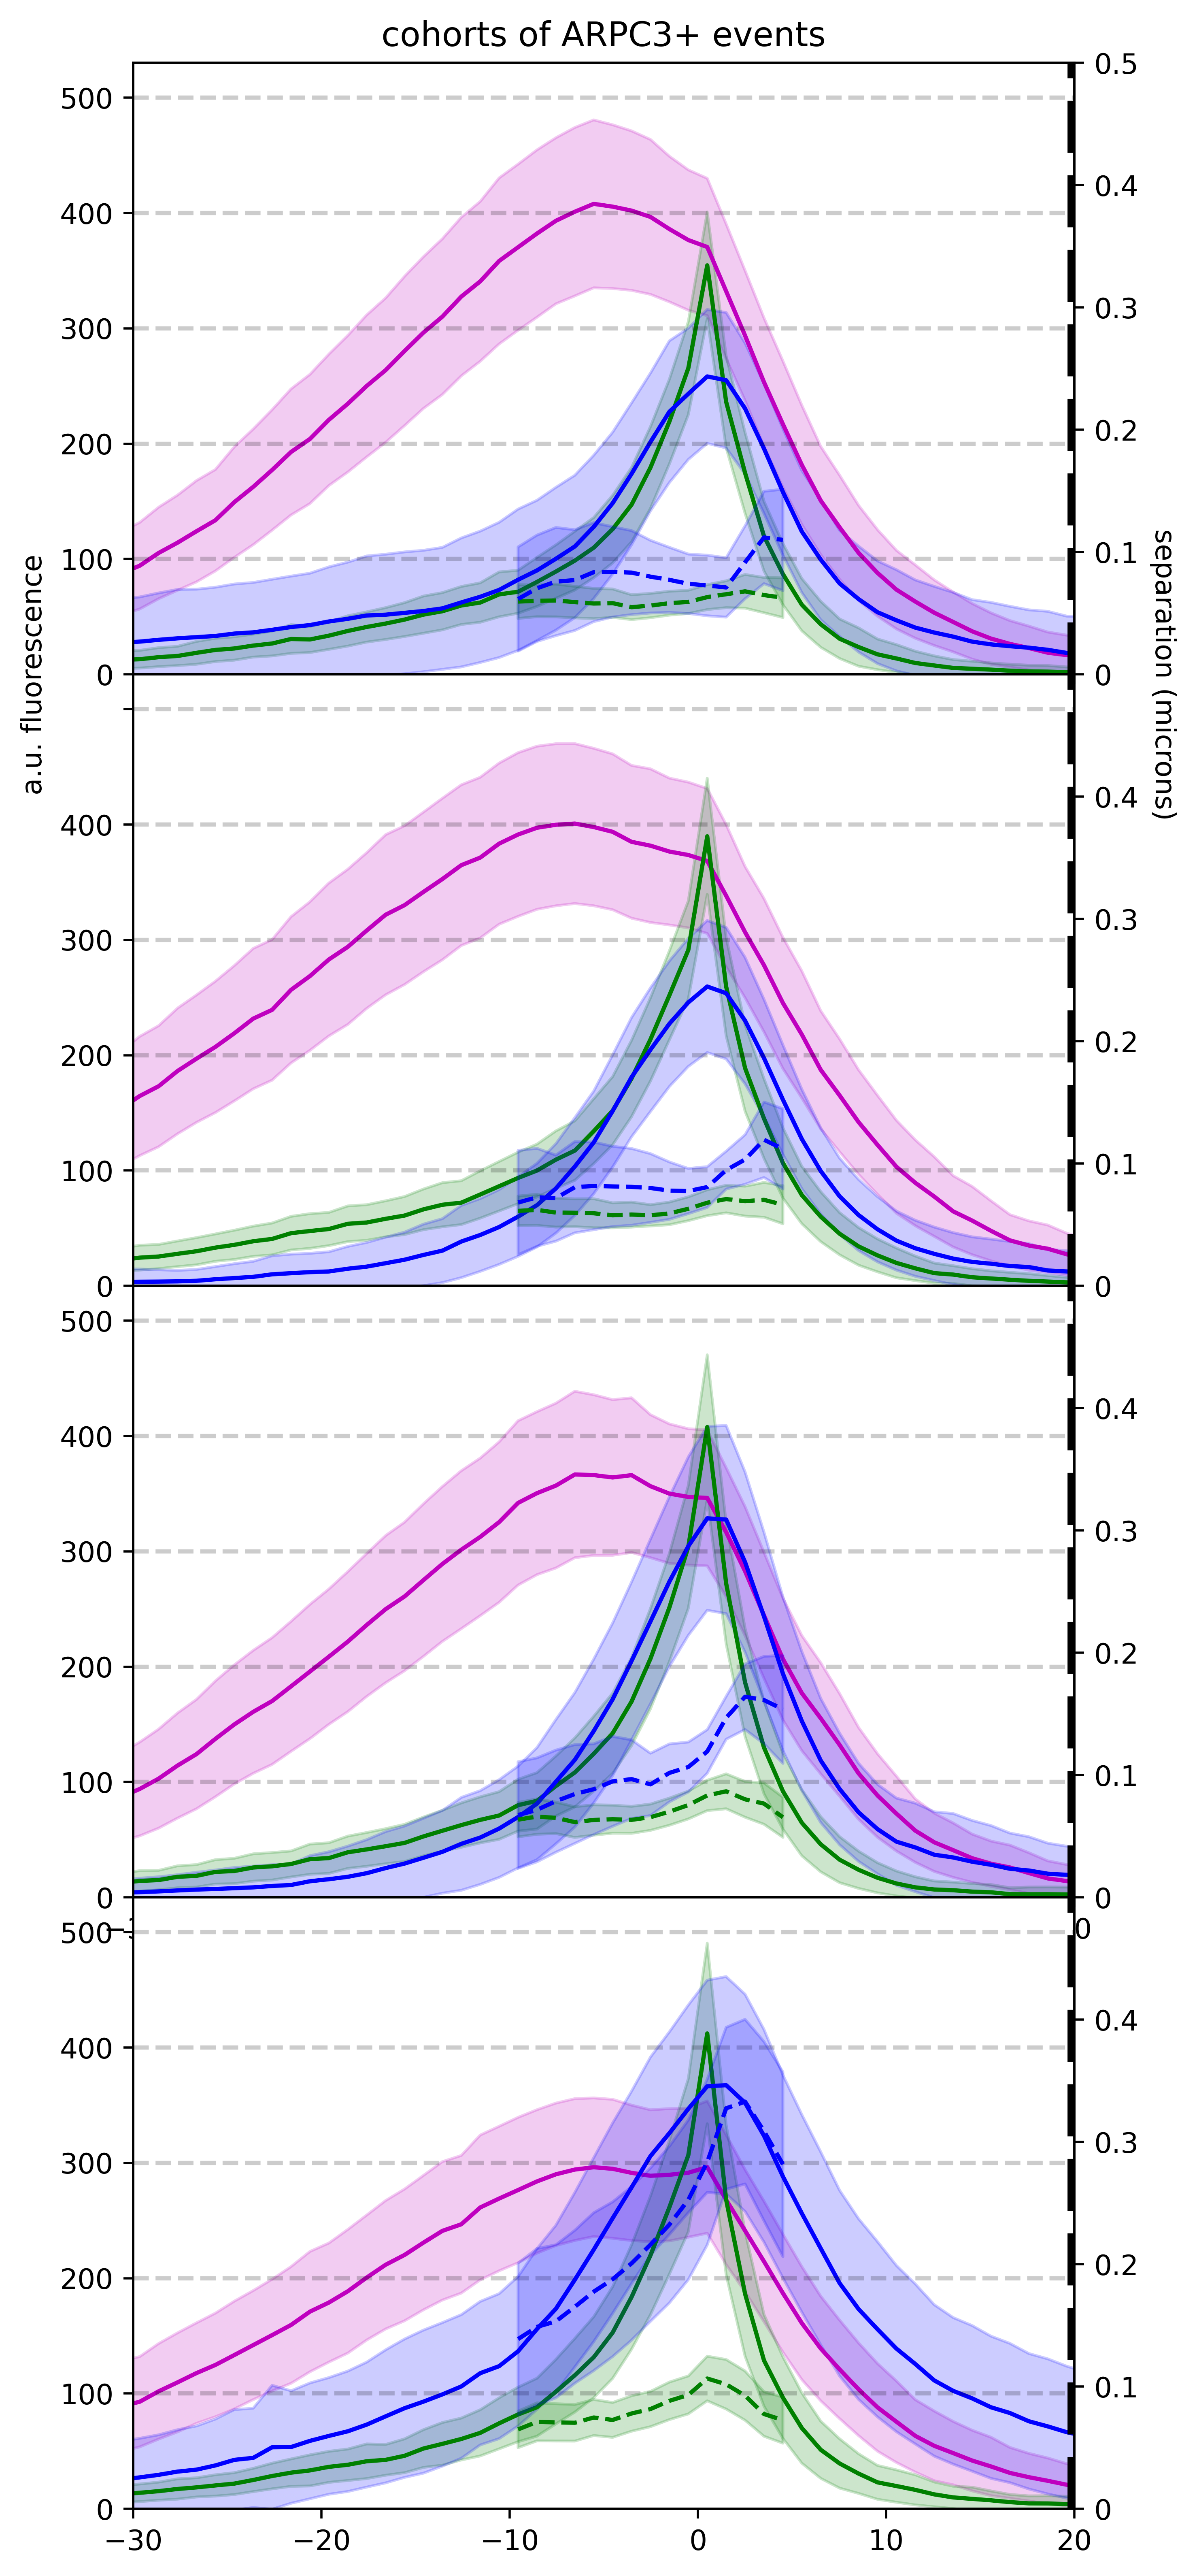

In [195]:
fig, (axes_0, axes_1, axes_2, axes_3) = plt.subplots(4, 1, dpi=500, figsize=(6,16), gridspec_kw=dict(height_ratios=[1,1,1,1]))
axes_separation_0 = axes_0.twinx()
axes_separation_1 = axes_1.twinx()
axes_separation_2 = axes_2.twinx()
axes_separation_3 = axes_3.twinx()

display_tracks.plot_separated_cohorts([axes_0, axes_separation_0], 
                                     channel_amplitudes_arpc3_positive_quantiles[0], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_0-10], [shift_0+5, 120]], [[0, shift_0-10], [shift_0+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_0, -shift_0, -shift_0, -shift_0, -shift_0])
                                                                        

display_tracks.plot_separated_cohorts([axes_1, axes_separation_1], 
                                     channel_amplitudes_arpc3_positive_quantiles[1], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_1-10], [shift_1+5, 120]], [[0, shift_1-10], [shift_1+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_1, -shift_1, -shift_1, -shift_1, -shift_1])


display_tracks.plot_separated_cohorts([axes_2, axes_separation_2], 
                                     channel_amplitudes_arpc3_positive_quantiles[2], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_2-10], [shift_2+5, 120]], [[0, shift_2-10], [shift_2+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_2, -shift_2, -shift_2, -shift_2, -shift_2])

display_tracks.plot_separated_cohorts([axes_3, axes_separation_3], 
                                     channel_amplitudes_arpc3_positive_quantiles[3], 
                                     1, 
                                     cohorts, 
                                     [0, 1, 2], 
                                     [3, 4], 
                                     ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                     ['m', 'g', 'b', 'g', 'b'],
                                     line_cutoff_index=[3, 4],
                                     line_cutoff_regions=[[], [], [], [[0, shift_3-10], [shift_3+5, 120]], [[0, shift_3-10], [shift_3+5, 120]]],
                                     horizontal_shift_index=[0, 1, 2, 3, 4], 
                                     horizontal_shift=[-shift_3, -shift_3, -shift_3, -shift_3, -shift_3])


y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_2.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_3.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 

axes_0.set_xlim([-30, 20]) 
axes_1.set_xlim([-30, 20]) 
axes_2.set_xlim([-30, 20]) 
axes_3.set_xlim([-30, 20]) 

axes_0.set_ylim([0,530])
axes_1.set_ylim([0,530])
axes_2.set_ylim([0,530])
axes_3.set_ylim([0,530])

axes_separation_0.set_ylim([0,0.5])
axes_separation_1.set_ylim([0,0.5])
axes_separation_2.set_ylim([0,0.5])
axes_separation_3.set_ylim([0,0.5])

axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)

axes_2.set_yticks([0,100,200,300,400, 500], minor=False)
axes_2.set_yticklabels([0,100,200,300, 400, 500], minor=False)

axes_3.set_yticks([0,100,200,300,400, 500], minor=False)
axes_3.set_yticklabels([0,100,200,300, 400, 500], minor=False)


axes_separation_0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)
axes_separation_0.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)

axes_separation_1.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_1.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)

axes_separation_2.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_2.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)

axes_separation_3.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_3.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)


plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)
# plt.show()
axes_0.axvline(20, color='black', linewidth=5, linestyle='--')
axes_1.axvline(20, color='black', linewidth=5, linestyle='--')
axes_2.axvline(20, color='black', linewidth=5, linestyle='--')
axes_3.axvline(20, color='black', linewidth=5, linestyle='--')

axes_0.text(-36,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);
axes_0.text(24,0, 'separation (microns)', rotation=270, va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of ARPC3+ events')
# plt.show()
plt.savefig('/Users/cynashirazinejad/Desktop/test.png')

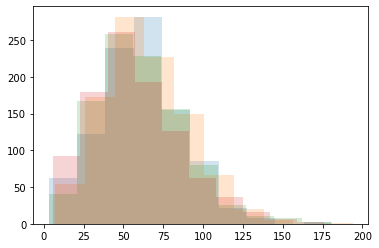

In [184]:
for group in set(separation_quantiles):
    
    indices_group = np.where(separation_quantiles==group)[0]
    ccp_lifetimes_quartile = np.array(ccp_lifetime_merged)[indices_group]
    plt.hist(ccp_lifetimes_quartile,alpha=0.2)

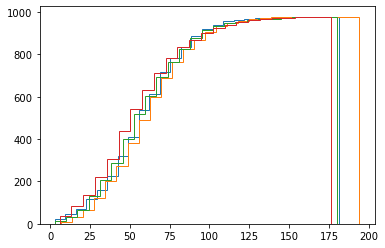

In [194]:
for group in set(separation_quantiles):
    
    indices_group = np.where(separation_quantiles==group)[0]
    ccp_lifetimes_quartile = np.array(ccp_lifetime_merged)[indices_group]
    plt.hist(ccp_lifetimes_quartile, cumulative=True, histtype='step', bins='auto')

In [188]:
df_sep['lifetime'] = ccp_lifetime_merged
df_sep['separation'] = separation_merged

In [189]:
df_sep

,distance,quantile,lifetime,separation
0,117.221692,0.0,98,0.045091
1,139.552132,2.0,115,0.138294
2,137.243252,2.0,127,0.167028
3,124.826504,1.0,60,0.081695
4,245.202765,1.0,126,0.113954
...,...,...,...,...
3907,257.888463,3.0,24,0.389715
3908,112.356535,0.0,13,0.032813
3909,123.551646,0.0,22,0.019403
3910,99.339101,0.0,6,0.000000


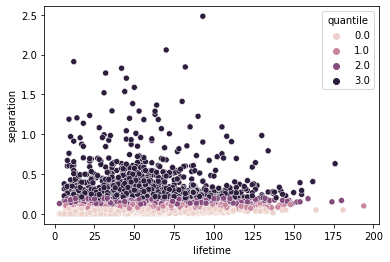

In [190]:
sns.scatterplot(data=df_sep,
                x='lifetime',
                y='separation',
                hue='quantile')